In [439]:
import pandas as pd
import numpy as np
import sklearn as sk
import tsfresh as ts

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


<h3>Data Preparation:</h3>

<h4>Definition der Dataframes:</h4>

Einlesen der Dateien als Dataframes aufgeteilt nach verschiedenen Sensoren (Accelerometer, Gyroscope, Orientation, Gravity)

Datenaufzeichnung mit Aktivitäten des alltäglichen Lebens: -> Aufteilung in einen Dataframe mit Label "df_walk"
- Laufen
- Treppe hoch
- Treppe runter
- auf Stuhl setzen
- Ins Bett legen

Fallen: (-> Aufteilung in einen Dataframe mit Label "df_fall")
- aus dem Laufen stürzen
- aus dem Stehen stürzen
- aus dem Sitzen stürzen



In [440]:
df = []

all_filenames = ["data/treppe_hochlaufen_Paul_v1.json",
"data/treppe_hochlaufen_Paul_v2.json",
"data/treppe_hochlaufen_Luca.json",
"data/treppe_runterlaufen_Paul_v1.json",
"data/treppe_runterlaufen_Paul_v2.json",
"data/treppe_runterlaufen_Luca.json",
"data/laufen_Paul_v1.json",
"data/laufen_Paul_v2.json",
"data/laufen_Luca.json",
"data/hinlegen_Paul_v1.json",
"data/hinlegen_Paul_v2.json",
"data/hinlegen_Luca.json",
"data/hinsetzen_Paul_v1.json",
"data/hinsetzen_Paul_v2.json",
"data/hinsetzen_Luca.json"]

for filename in all_filenames:
    df_walk = pd.read_json(filename)
    df.append(df_walk)

#df[1]

df_walk = pd.concat(df)
#print(df)


df_f = []
all_filenames_f = ["data/laufen_fall_Paul_1.json",
                   "data/laufen_fall_Paul_2.json",
                   "data/laufen_fall_Paul_3.json",
                   "data/laufen_fall_Paul_4.json",
                   "data/laufen_fall_Paul_5.json",
                   "data/laufen_fall_Paul_6.json",
                   # "data/laufen_fall_Paul_7.json", # fehler im datensatz
                   "data/laufen_fall_Paul_8.json",
                   "data/laufen_fall_Paul_9.json",
                   "data/laufen_fall_Paul_10.json",
                   "data/fall_stehen_Luca_1.json",
                   "data/fall_stehen_Luca_2.json",
                   "data/fall_stehen_Luca_3.json",
                   "data/fall_stehen_Luca_4.json",
                   "data/fall_stehen_Luca_5.json",
                   "data/fall_stehen_Luca_6.json",
                   "data/fall_stehen_Luca_7.json",
                   "data/fall_stehen_Luca_8.json",
                   "data/fall_stehen_Luca_9.json",
                   "data/fall_stehen_Luca_10.json",
                   "data/sitzen_fall_Paul_1.json",
                   "data/sitzen_fall_Paul_2.json",
                   "data/sitzen_fall_Paul_3.json",
                   "data/sitzen_fall_Paul_4.json",
                   "data/sitzen_fall_Paul_5.json",
                   "data/sitzen_fall_Paul_6.json",
                   "data/sitzen_fall_Paul_7.json",
                   "data/sitzen_fall_Paul_8.json",
                   "data/sitzen_fall_Paul_9.json",
                   "data/sitzen_fall_Paul_10.json"
                    ]   

for filename in all_filenames_f:
    df_fall= pd.read_json(filename)
    df_f.append(df_fall)
#df_f[1]

df_fall = pd.concat(df_f)



In [441]:
df_walk

,sensor,time,seconds_elapsed,z,y,x,version,device name,recording time,platform,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
0,Accelerometer,1.685385e+18,0.028716,0.528048,-1.101480,-1.048881,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accelerometer,1.685385e+18,0.038684,0.078242,-0.974611,-1.168716,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accelerometer,1.685385e+18,0.048653,-1.147857,-1.113927,-1.032955,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accelerometer,1.685385e+18,0.058621,-1.713861,-1.347224,-0.949106,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Accelerometer,1.685385e+18,0.068590,-1.450866,-1.383157,-0.911834,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24602,Orientation,1.687521e+18,41.081099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.264588,0.092522,-0.141666,-0.210931,0.978505,-0.117890,0.216148
24603,Orientation,1.687521e+18,41.091123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.259488,0.096418,-0.139080,-0.203243,0.978931,-0.114255,0.222382
24604,Orientation,1.687521e+18,41.101146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.255962,0.100953,-0.137378,-0.196957,0.979036,-0.111464,0.230329
24605,Orientation,1.687521e+18,41.111170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.253211,0.105689,-0.136156,-0.192533,0.978911,-0.109655,0.239051


Veranschaulichung exemplarischer Dataframes:

Auswahl der relevanten Spalten/ Informationen aus dem Datensatz

In [442]:
df_walk.columns

Index(['sensor', 'time', 'seconds_elapsed', 'z', 'y', 'x', 'version',
       'device name', 'recording time', 'platform', 'appVersion', 'device id',
       'sensors', 'sampleRateMs', 'yaw', 'qx', 'qz', 'roll', 'qw', 'qy',
       'pitch'],
      dtype='object')

Umrechnung der Zeit aus Sekunden in einen Zeitstempel:

In [443]:
#preprocessing data
df_walk['time'] = pd.to_datetime(df_walk['time'])
df_fall['time'] = pd.to_datetime(df_fall['time'])

df_walk.head()

,sensor,time,seconds_elapsed,z,y,x,version,device name,recording time,platform,...,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
0,Accelerometer,2023-05-29 18:29:11.100716288,0.028716,0.528048,-1.101480,-1.048881,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accelerometer,2023-05-29 18:29:11.110684416,0.038684,0.078242,-0.974611,-1.168716,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Accelerometer,2023-05-29 18:29:11.120653312,0.048653,-1.147857,-1.113927,-1.032955,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Accelerometer,2023-05-29 18:29:11.130621440,0.058621,-1.713861,-1.347224,-0.949106,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Accelerometer,2023-05-29 18:29:11.140590336,0.068590,-1.450866,-1.383157,-0.911834,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Index als Zeitstempel definiert:

In [444]:
df_walk = df_walk.set_index('time')
df_fall = df_fall.set_index('time')



Ausgabe aller Sensoren, die in Datensatz vorhanden sind:

In [445]:
df_walk['sensor'].unique()

array(['Accelerometer', 'AccelerometerUncalibrated', 'Gravity',
       'Gyroscope', 'GyroscopeUncalibrated', 'Metadata', 'Orientation'],
      dtype=object)

In [446]:
df_fall['sensor'].unique()

array(['Accelerometer', 'AccelerometerUncalibrated', 'Gravity',
       'Gyroscope', 'GyroscopeUncalibrated', 'Metadata', 'Orientation'],
      dtype=object)

Quick Fix der SensorBezeichner:

Aufteilung der Daten nach den zu betrachtenden Sensoren:

In [447]:
df_walk_acc = df_walk[df_walk['sensor'] == 'AccelerometerUncalibrated']
df_fall_acc = df_fall[df_fall['sensor'] == 'AccelerometerUncalibrated']


df_walk_gyro = df_walk[df_walk['sensor'] == 'GyroscopeUncalibrated']
df_fall_gyro = df_fall[df_fall['sensor'] == 'GyroscopeUncalibrated']


df_walk_or = df_walk[df_walk['sensor'] == 'Orientation']
df_fall_or = df_fall[df_fall['sensor'] == 'Orientation']


df_walk_grav = df_walk[df_walk['sensor'] == 'Gravity']
df_fall_grav = df_fall[df_fall['sensor'] == 'Gravity']


Beschreiben des Datensatzes:

In [448]:
df_fall_acc

,sensor,seconds_elapsed,z,y,x,version,device name,recording time,platform,appVersion,device id,sensors,sampleRateMs,yaw,qx,qz,roll,qw,qy,pitch
time,,,,,,,,,,,,,,,,,,,,
2023-06-23 12:08:21.920027904,AccelerometerUncalibrated,0.022028,-0.951218,-0.583588,0.104538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-23 12:08:21.929996032,AccelerometerUncalibrated,0.031996,-1.022659,-0.578735,0.091064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-23 12:08:21.939963904,AccelerometerUncalibrated,0.041964,-1.031525,-0.541168,0.076263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-23 12:08:21.949931008,AccelerometerUncalibrated,0.051931,-1.032669,-0.519211,0.092682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-23 12:08:21.959898880,AccelerometerUncalibrated,0.061899,-1.041367,-0.511246,0.109665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-29 18:18:14.354990848,AccelerometerUncalibrated,5.017991,-0.647324,-0.775787,0.200012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-29 18:18:14.364957696,AccelerometerUncalibrated,5.027958,-0.549530,-0.706955,0.153900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-05-29 18:18:14.374925824,AccelerometerUncalibrated,5.037926,-0.617737,-0.624939,0.139297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [449]:
df_fall_or.describe()

,seconds_elapsed,z,y,x,version,yaw,qx,qz,roll,qw,qy,pitch
count,12624.000000,0.0,0.0,0.0,0.0,12624.000000,12624.000000,12624.000000,12624.000000,12624.000000,12624.000000,12624.000000
mean,2.434447,NaN,NaN,NaN,NaN,-0.270328,0.024429,-0.141513,0.402509,-0.410821,-0.094429,0.303589
std,1.637210,NaN,NaN,NaN,NaN,1.350292,0.300100,0.514419,1.072603,0.547397,0.383952,0.363227
min,0.019016,NaN,NaN,NaN,NaN,-3.139099,-0.801361,-0.968644,-3.141320,-0.998924,-0.986526,-0.819194
25%,1.111583,NaN,NaN,NaN,NaN,-1.559304,-0.168361,-0.565529,-0.061912,-0.793492,-0.302598,0.107609
50%,2.204819,NaN,NaN,NaN,NaN,-0.479463,0.004642,-0.323370,0.365799,-0.641367,-0.102453,0.290823
75%,3.490608,NaN,NaN,NaN,NaN,0.970840,0.238402,0.405694,0.995536,-0.243797,0.156635,0.491347
max,7.080799,NaN,NaN,NaN,NaN,3.123546,0.845699,0.858998,3.116903,0.967051,0.958279,1.529332


Auswahl der relevanten Spalten aus den Dataframes der nach Sensordaten:

-> Hier wurden die Werte z,x,y aus den Gyro Sensoren in z_ umbenannt, um später für den join der Tabellen eindeutige Spalten zu erzeugen

In [450]:
df_walk_acc = df_walk_acc[['z','x','y']]
df_fall_acc = df_fall_acc[['z','x','y']]


df_walk_gyro = df_walk_gyro[['z','x','y']]
df_fall_gyro = df_fall_gyro[['z','x','y']]


df_walk_or = df_walk_or[['qx','qz','qw','qy']]
df_fall_or = df_fall_or[['qx','qz','qw','qy']]


df_walk_grav = df_walk_grav[['z','x','y']]
df_fall_grav = df_fall_grav[['z','x','y']]

df_walk_gyro.rename(columns={ 'z': 'gyro_z' , 'x': 'gyro_x' , 'y': 'gyro_y'}, inplace=True)
df_fall_gyro.rename(columns={ 'z': 'gyro_z' , 'x': 'gyro_x' , 'y': 'gyro_y'}, inplace=True)

df_walk_grav.rename(columns={ 'z': 'grav_z' , 'x': 'grav_x' , 'y': 'grav_y'}, inplace=True)
df_fall_grav.rename(columns={ 'z': 'grav_z' , 'x': 'grav_x' , 'y': 'grav_y'}, inplace=True)


In [451]:
len(df_fall_acc)-len(df_fall_or) #test länge

0

In [452]:
len(df_walk_grav)

73045

Plot der Dataframes zur Kontrolle und Veranschaulichung der Werte:

<Axes: xlabel='time'>

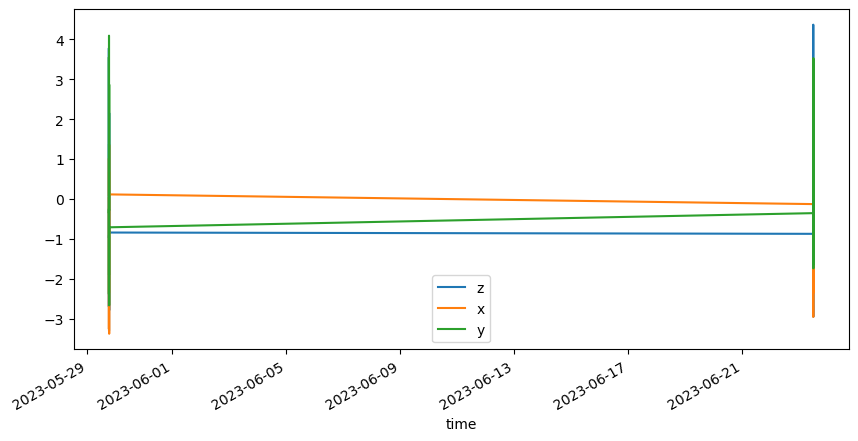

In [453]:
df_walk_acc.plot(figsize=(10,5))

<Axes: xlabel='time'>

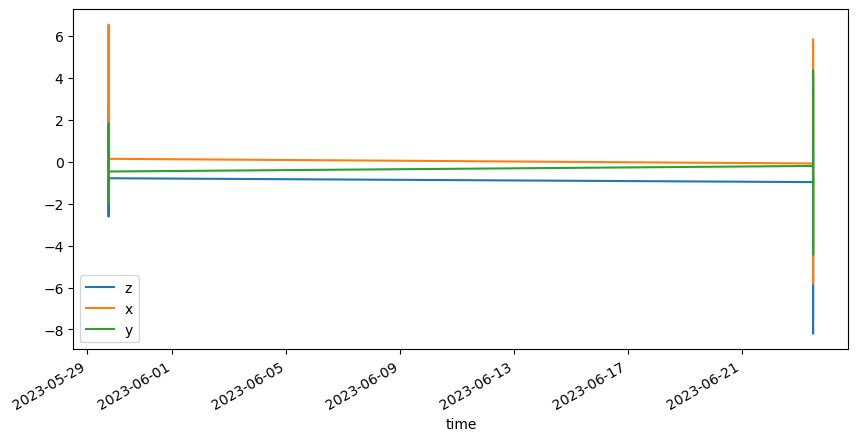

In [454]:
df_fall_acc.plot(figsize=(10,5))

<Axes: xlabel='time'>

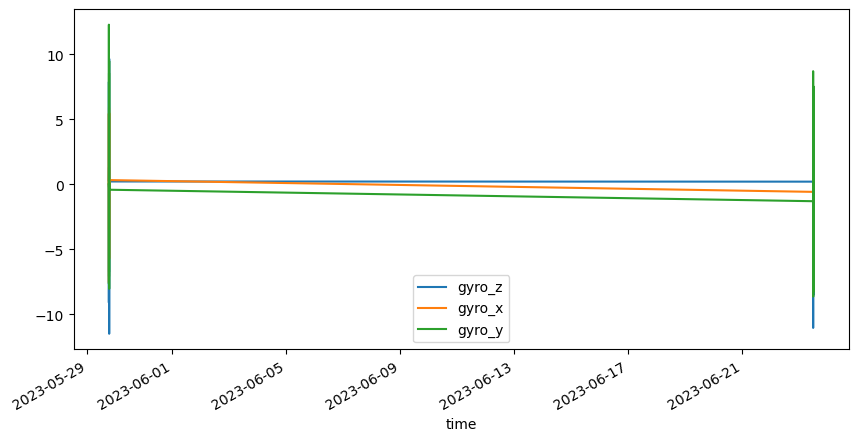

In [455]:
df_walk_gyro.plot(figsize=(10,5))

<Axes: xlabel='time'>

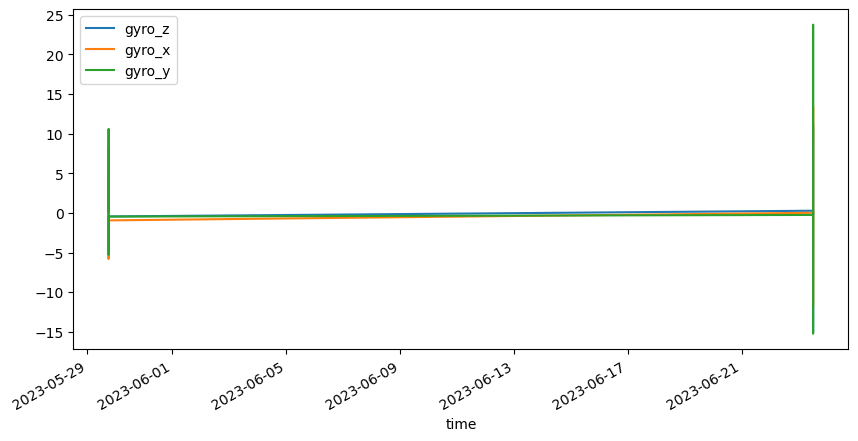

In [456]:
df_fall_gyro.plot(figsize=(10,5))

Vergabe von Labels auf der Basis des Dataframe Ursprungs (Einteilung in Walk und Fall):

-> Verbinden der verschiedenen DataFrames nach Sensoren zu einem kombinierten Dataframe

In [457]:
df_walk_acc['label'] = "walk"
df_fall_acc['label'] = "fall"

df_walk_gyro['label'] = "walk"
df_fall_gyro['label'] = "fall"

df_walk_or['label'] = "walk"
df_fall_or['label'] = "fall"

df_walk_grav['label'] = "walk"  
df_fall_grav['label'] = "fall"

/var/folders/qx/8gbd6p3d2fvd68v69qkz7szr0000gn/T/ipykernel_55412/2635588316.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fall_acc['label'] = "fall"


In [458]:

df_walk_acc['index'] = 0
df_walk_gyro['index'] = 0
df_walk_or['index'] = 0
df_walk_grav['index'] = 0
for i in range(len(df_walk_acc)):
    df_walk_acc.iloc[i,4]= i
    df_walk_gyro.iloc[i,4]= i
    df_walk_or.iloc[i,5]= i
    df_walk_grav.iloc[i,4]= i


In [459]:
df_fall_acc['index'] = 0    
df_fall_gyro['index'] = 0
df_fall_or['index'] = 0
df_fall_grav['index'] = 0
for i in range(len(df_fall_acc)):
    df_fall_acc.iloc[i,4]= i
    df_fall_gyro.iloc[i,4]= i
    df_fall_or.iloc[i,5]= i
    df_fall_grav.iloc[i,4]= i

/var/folders/qx/8gbd6p3d2fvd68v69qkz7szr0000gn/T/ipykernel_55412/1633209275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fall_acc['index'] = 0


In [460]:
df_fall_acc

,z,x,y,label,index
time,,,,,
2023-06-23 12:08:21.920027904,-0.951218,0.104538,-0.583588,fall,0
2023-06-23 12:08:21.929996032,-1.022659,0.091064,-0.578735,fall,1
2023-06-23 12:08:21.939963904,-1.031525,0.076263,-0.541168,fall,2
2023-06-23 12:08:21.949931008,-1.032669,0.092682,-0.519211,fall,3
2023-06-23 12:08:21.959898880,-1.041367,0.109665,-0.511246,fall,4
...,...,...,...,...,...
2023-05-29 18:18:14.354990848,-0.647324,0.200012,-0.775787,fall,12619
2023-05-29 18:18:14.364957696,-0.549530,0.153900,-0.706955,fall,12620
2023-05-29 18:18:14.374925824,-0.617737,0.139297,-0.624939,fall,12621


In [461]:
df_fall_or

,qx,qz,qw,qy,label,index
time,,,,,,
2023-06-23 12:08:21.929996032,-0.136441,0.737500,-0.648614,0.129529,fall,0
2023-06-23 12:08:21.939963904,-0.134726,0.738378,-0.648139,0.128694,fall,1
2023-06-23 12:08:21.949931008,-0.131884,0.739366,-0.647804,0.127649,fall,2
2023-06-23 12:08:21.959898880,-0.128086,0.740473,-0.647501,0.126637,fall,3
2023-06-23 12:08:21.969865728,-0.123673,0.741670,-0.647113,0.125999,fall,4
...,...,...,...,...,...,...
2023-05-29 18:18:14.368695808,-0.084575,-0.831467,-0.452654,-0.310828,fall,12619
2023-05-29 18:18:14.378663680,-0.083623,-0.831594,-0.455340,-0.306797,fall,12620
2023-05-29 18:18:14.388631808,-0.082604,-0.831873,-0.457776,-0.302664,fall,12621


In [462]:
df_combined_fall= pd.merge(df_fall_acc, df_fall_gyro, on='index')
df_combined_fall = pd.merge(df_combined_fall, df_fall_or, on='index')
df_combined_fall = pd.merge(df_combined_fall, df_fall_grav, on='index')

/var/folders/qx/8gbd6p3d2fvd68v69qkz7szr0000gn/T/ipykernel_55412/319659904.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'label_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_combined_fall = pd.merge(df_combined_fall, df_fall_grav, on='index')


In [463]:
df_combined_fall

,z,x,y,label_x,index,gyro_z,gyro_x,gyro_y,label_y,qx,qz,qw,qy,label_x,grav_z,grav_x,grav_y,label_y
0,-0.951218,0.104538,-0.583588,fall,0,-0.227711,-0.149521,-0.071594,fall,-0.136441,0.737500,-0.648614,0.129529,fall,-9.112459,0.325787,-3.609341,fall
1,-1.022659,0.091064,-0.578735,fall,1,-0.164415,-0.358667,-0.183036,fall,-0.134726,0.738378,-0.648139,0.128694,fall,-9.125808,0.315138,-3.576409,fall
2,-1.031525,0.076263,-0.541168,fall,2,-0.137551,-0.544335,-0.326385,fall,-0.131884,0.739366,-0.647804,0.127649,fall,-9.145923,0.290651,-3.526755,fall
3,-1.032669,0.092682,-0.519211,fall,3,-0.121541,-0.671441,-0.474867,fall,-0.128086,0.740473,-0.647501,0.126637,fall,-9.170334,0.251959,-3.465814,fall
4,-1.041367,0.109665,-0.511246,fall,4,-0.122068,-0.695108,-0.618099,fall,-0.123673,0.741670,-0.647113,0.125999,fall,-9.195290,0.199836,-3.402512,fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12619,-0.647324,0.200012,-0.775787,fall,12619,-0.482918,-0.586219,-1.868836,fall,-0.084575,-0.831467,-0.452654,-0.310828,fall,-7.771439,1.380315,-5.819781,fall
12620,-0.549530,0.153900,-0.706955,fall,12620,-0.497110,-0.758007,-0.726838,fall,-0.083623,-0.831594,-0.455340,-0.306797,fall,-7.823412,1.376006,-5.750758,fall
12621,-0.617737,0.139297,-0.624939,fall,12621,-0.417602,-0.820484,-0.331780,fall,-0.082604,-0.831873,-0.457776,-0.302664,fall,-7.876134,1.369718,-5.679855,fall
12622,-0.750137,0.128113,-0.544067,fall,12622,-0.372141,-0.842503,-0.363142,fall,-0.081654,-0.832096,-0.460600,-0.297987,fall,-7.934289,1.359386,-5.600849,fall


In [464]:
df_combined_walk = pd.merge(df_walk_acc, df_walk_gyro, on='index')
df_combined_walk = pd.merge(df_combined_walk, df_walk_or, on='index')
df_combined_walk = pd.merge(df_combined_walk, df_walk_grav, on='index')

/var/folders/qx/8gbd6p3d2fvd68v69qkz7szr0000gn/T/ipykernel_55412/1095351064.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'label_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_combined_walk = pd.merge(df_combined_walk, df_walk_grav, on='index')


In [465]:
df_walk_grav

,grav_z,grav_x,grav_y,label,index
time,,,,,
2023-05-29 18:29:11.100716288,-9.283345,1.252837,-2.901774,walk,0
2023-05-29 18:29:11.110684416,-9.277962,1.263886,-2.914171,walk,1
2023-05-29 18:29:11.120653312,-9.269165,1.267437,-2.940503,walk,2
2023-05-29 18:29:11.130621440,-9.259364,1.245238,-2.980595,walk,3
2023-05-29 18:29:11.140590336,-9.247922,1.199737,-3.034294,walk,4
...,...,...,...,...,...
2023-06-23 11:57:04.366099456,-9.366165,-2.005443,-2.103217,walk,73040
2023-06-23 11:57:04.376123136,-9.368280,-1.930698,-2.162896,walk,73041
2023-06-23 11:57:04.386146304,-9.363081,-1.868341,-2.238839,walk,73042


In [466]:
df_combined_walk.columns

Index(['z', 'x', 'y', 'label_x', 'index', 'gyro_z', 'gyro_x', 'gyro_y',
       'label_y', 'qx', 'qz', 'qw', 'qy', 'label_x', 'grav_z', 'grav_x',
       'grav_y', 'label_y'],
      dtype='object')

Check der kombinierten DataFrames:

In [467]:
df_walk_grav.head()

,grav_z,grav_x,grav_y,label,index
time,,,,,
2023-05-29 18:29:11.100716288,-9.283345,1.252837,-2.901774,walk,0
2023-05-29 18:29:11.110684416,-9.277962,1.263886,-2.914171,walk,1
2023-05-29 18:29:11.120653312,-9.269165,1.267437,-2.940503,walk,2
2023-05-29 18:29:11.130621440,-9.259364,1.245238,-2.980595,walk,3
2023-05-29 18:29:11.140590336,-9.247922,1.199737,-3.034294,walk,4


In [468]:
df_combined_walk

,z,x,y,label_x,index,gyro_z,gyro_x,gyro_y,label_y,qx,qz,qw,qy,label_x,grav_z,grav_x,grav_y,label_y
0,-0.967041,0.045380,-0.416260,walk,0,-0.231949,-0.061879,-0.161013,walk,-0.161488,0.522772,-0.836677,0.024555,walk,-9.283345,1.252837,-2.901774,walk
1,-0.893433,0.025757,-0.411240,walk,1,-0.233592,0.107064,0.017106,walk,-0.162328,0.523671,-0.835950,0.024602,walk,-9.277962,1.263886,-2.914171,walk
2,-0.919373,0.010162,-0.397598,walk,2,-0.242437,0.257259,0.047374,walk,-0.163583,0.524648,-0.835069,0.025390,walk,-9.269165,1.267437,-2.940503,walk
3,-1.028580,0.019272,-0.406296,walk,3,-0.239005,0.409722,-0.204598,walk,-0.164727,0.525812,-0.834037,0.027728,walk,-9.259364,1.245238,-2.980595,walk
4,-1.118225,0.030807,-0.435394,walk,4,-0.229730,0.553924,-0.496498,walk,-0.165817,0.527081,-0.832885,0.031493,walk,-9.247922,1.199737,-3.034294,walk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73040,-1.127563,-0.665344,-0.010620,walk,73040,0.723139,0.435555,0.885818,walk,0.092522,-0.141666,0.978505,-0.117890,walk,-9.366165,-2.005443,-2.103217,walk
73041,-1.115173,-0.743195,-0.009674,walk,73041,0.476397,0.617936,0.918643,walk,0.096418,-0.139080,0.978931,-0.114255,walk,-9.368280,-1.930698,-2.162896,walk
73042,-1.076569,-0.730469,-0.030258,walk,73042,0.255614,0.788783,0.811859,walk,0.100953,-0.137378,0.979036,-0.111464,walk,-9.363081,-1.868341,-2.238839,walk
73043,-1.023438,-0.658432,-0.059662,walk,73043,0.120825,0.884639,0.594272,walk,0.105689,-0.136156,0.978911,-0.109655,walk,-9.351731,-1.823100,-2.322028,walk


In [469]:
df_combined_walk.describe()
len(df_combined_walk)

73045

In [470]:
df_combined_fall.head(-5)

,z,x,y,label_x,index,gyro_z,gyro_x,gyro_y,label_y,qx,qz,qw,qy,label_x,grav_z,grav_x,grav_y,label_y
0,-0.951218,0.104538,-0.583588,fall,0,-0.227711,-0.149521,-0.071594,fall,-0.136441,0.737500,-0.648614,0.129529,fall,-9.112459,0.325787,-3.609341,fall
1,-1.022659,0.091064,-0.578735,fall,1,-0.164415,-0.358667,-0.183036,fall,-0.134726,0.738378,-0.648139,0.128694,fall,-9.125808,0.315138,-3.576409,fall
2,-1.031525,0.076263,-0.541168,fall,2,-0.137551,-0.544335,-0.326385,fall,-0.131884,0.739366,-0.647804,0.127649,fall,-9.145923,0.290651,-3.526755,fall
3,-1.032669,0.092682,-0.519211,fall,3,-0.121541,-0.671441,-0.474867,fall,-0.128086,0.740473,-0.647501,0.126637,fall,-9.170334,0.251959,-3.465814,fall
4,-1.041367,0.109665,-0.511246,fall,4,-0.122068,-0.695108,-0.618099,fall,-0.123673,0.741670,-0.647113,0.125999,fall,-9.195290,0.199836,-3.402512,fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12614,-1.076965,0.363937,-0.475159,fall,12614,-0.714543,2.400685,-3.465958,fall,-0.023629,-0.840778,-0.416607,-0.344925,fall,-7.462241,2.428740,-5.881034,fall
12615,-1.226120,0.453964,-0.677551,fall,12615,-0.580247,1.536963,-5.076506,fall,-0.046660,-0.837391,-0.427356,-0.337588,fall,-7.528707,2.063271,-5.935643,fall
12616,-1.030090,0.460510,-0.760925,fall,12616,-0.450843,0.769894,-5.294243,fall,-0.064503,-0.834718,-0.436247,-0.329810,fall,-7.591621,1.765910,-5.951405,fall
12617,-0.733307,0.424103,-0.782990,fall,12617,-0.442283,0.256716,-4.139622,fall,-0.076892,-0.832813,-0.443512,-0.322191,fall,-7.654692,1.546684,-5.931597,fall


Bestimmung der Länge der Datensätze:

In [471]:
df_help = df_combined_walk.reset_index()
print(df_help.iloc[-1,0] - df_help.iloc[0,0])

73044


In [472]:
df_combined_walk = df_combined_walk.iloc[:,:-1]
df_combined_fall = df_combined_fall.iloc[:,:-1]
df_combined_walk

,z,x,y,label_x,index,gyro_z,gyro_x,gyro_y,label_y,qx,qz,qw,qy,label_x,grav_z,grav_x,grav_y
0,-0.967041,0.045380,-0.416260,walk,0,-0.231949,-0.061879,-0.161013,walk,-0.161488,0.522772,-0.836677,0.024555,walk,-9.283345,1.252837,-2.901774
1,-0.893433,0.025757,-0.411240,walk,1,-0.233592,0.107064,0.017106,walk,-0.162328,0.523671,-0.835950,0.024602,walk,-9.277962,1.263886,-2.914171
2,-0.919373,0.010162,-0.397598,walk,2,-0.242437,0.257259,0.047374,walk,-0.163583,0.524648,-0.835069,0.025390,walk,-9.269165,1.267437,-2.940503
3,-1.028580,0.019272,-0.406296,walk,3,-0.239005,0.409722,-0.204598,walk,-0.164727,0.525812,-0.834037,0.027728,walk,-9.259364,1.245238,-2.980595
4,-1.118225,0.030807,-0.435394,walk,4,-0.229730,0.553924,-0.496498,walk,-0.165817,0.527081,-0.832885,0.031493,walk,-9.247922,1.199737,-3.034294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73040,-1.127563,-0.665344,-0.010620,walk,73040,0.723139,0.435555,0.885818,walk,0.092522,-0.141666,0.978505,-0.117890,walk,-9.366165,-2.005443,-2.103217
73041,-1.115173,-0.743195,-0.009674,walk,73041,0.476397,0.617936,0.918643,walk,0.096418,-0.139080,0.978931,-0.114255,walk,-9.368280,-1.930698,-2.162896
73042,-1.076569,-0.730469,-0.030258,walk,73042,0.255614,0.788783,0.811859,walk,0.100953,-0.137378,0.979036,-0.111464,walk,-9.363081,-1.868341,-2.238839
73043,-1.023438,-0.658432,-0.059662,walk,73043,0.120825,0.884639,0.594272,walk,0.105689,-0.136156,0.978911,-0.109655,walk,-9.351731,-1.823100,-2.322028


Ausschluss der Spalte "label_x" da redundant: 

In [473]:
df_combined_walk.drop('label_x',axis=1, inplace=True)
df_combined_fall.drop('label_x',axis=1, inplace=True)

df_combined_walk.drop('index',axis=1, inplace=True)
df_combined_fall.drop('index',axis=1, inplace=True)


In [474]:
df_combined_walk

,z,x,y,gyro_z,gyro_x,gyro_y,label_y,qx,qz,qw,qy,grav_z,grav_x,grav_y
0,-0.967041,0.045380,-0.416260,-0.231949,-0.061879,-0.161013,walk,-0.161488,0.522772,-0.836677,0.024555,-9.283345,1.252837,-2.901774
1,-0.893433,0.025757,-0.411240,-0.233592,0.107064,0.017106,walk,-0.162328,0.523671,-0.835950,0.024602,-9.277962,1.263886,-2.914171
2,-0.919373,0.010162,-0.397598,-0.242437,0.257259,0.047374,walk,-0.163583,0.524648,-0.835069,0.025390,-9.269165,1.267437,-2.940503
3,-1.028580,0.019272,-0.406296,-0.239005,0.409722,-0.204598,walk,-0.164727,0.525812,-0.834037,0.027728,-9.259364,1.245238,-2.980595
4,-1.118225,0.030807,-0.435394,-0.229730,0.553924,-0.496498,walk,-0.165817,0.527081,-0.832885,0.031493,-9.247922,1.199737,-3.034294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73040,-1.127563,-0.665344,-0.010620,0.723139,0.435555,0.885818,walk,0.092522,-0.141666,0.978505,-0.117890,-9.366165,-2.005443,-2.103217
73041,-1.115173,-0.743195,-0.009674,0.476397,0.617936,0.918643,walk,0.096418,-0.139080,0.978931,-0.114255,-9.368280,-1.930698,-2.162896
73042,-1.076569,-0.730469,-0.030258,0.255614,0.788783,0.811859,walk,0.100953,-0.137378,0.979036,-0.111464,-9.363081,-1.868341,-2.238839
73043,-1.023438,-0.658432,-0.059662,0.120825,0.884639,0.594272,walk,0.105689,-0.136156,0.978911,-0.109655,-9.351731,-1.823100,-2.322028


Überprüfen der Vollständigkeit des Datensatzes:

In [475]:
laenge = len(df_walk_acc) + len(df_walk_gyro)
print("Doppelte Zeilen in Dataframes, ohne join auf Time:", laenge)
print("Einfache Anzahl an Zeilen, bei richtigem Merge:",len(df_combined_walk))
print("Länge des Merges:", len(df_combined_walk))

Doppelte Zeilen in Dataframes, ohne join auf Time: 146090
Einfache Anzahl an Zeilen, bei richtigem Merge: 73045
Länge des Merges: 73045


Aufteilen der DF's in einzelne Abschnitte mit den Abständen 100 Datenpunkte:
- ToDo: Anpassen der Länge von Sequenzen und deren Auswirkung auf die Modellgüte/ Accuracy

In [476]:
df_combined_walk['id'] = 0
df_combined_fall['id'] = 0

id = 1

var1 = 100
var2 = 100

for i in range(0, len(df_combined_walk)):
    df_combined_walk.iloc[i,14] = id
    

    if i >= var1: 
        var1 = var1 + 100
        id+=1

id +=1

for i in range(0, len(df_combined_fall)):
    
    df_combined_fall.iloc[i,14] = id

    if i >= var2: 
        var2 = var2 + 100
        id+=1  

In [477]:
df_combined_walk

,z,x,y,gyro_z,gyro_x,gyro_y,label_y,qx,qz,qw,qy,grav_z,grav_x,grav_y,id
0,-0.967041,0.045380,-0.416260,-0.231949,-0.061879,-0.161013,walk,1.0,0.522772,-0.836677,0.024555,-9.283345,1.252837,-2.901774,0
1,-0.893433,0.025757,-0.411240,-0.233592,0.107064,0.017106,walk,1.0,0.523671,-0.835950,0.024602,-9.277962,1.263886,-2.914171,0
2,-0.919373,0.010162,-0.397598,-0.242437,0.257259,0.047374,walk,1.0,0.524648,-0.835069,0.025390,-9.269165,1.267437,-2.940503,0
3,-1.028580,0.019272,-0.406296,-0.239005,0.409722,-0.204598,walk,1.0,0.525812,-0.834037,0.027728,-9.259364,1.245238,-2.980595,0
4,-1.118225,0.030807,-0.435394,-0.229730,0.553924,-0.496498,walk,1.0,0.527081,-0.832885,0.031493,-9.247922,1.199737,-3.034294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73040,-1.127563,-0.665344,-0.010620,0.723139,0.435555,0.885818,walk,731.0,-0.141666,0.978505,-0.117890,-9.366165,-2.005443,-2.103217,0
73041,-1.115173,-0.743195,-0.009674,0.476397,0.617936,0.918643,walk,731.0,-0.139080,0.978931,-0.114255,-9.368280,-1.930698,-2.162896,0
73042,-1.076569,-0.730469,-0.030258,0.255614,0.788783,0.811859,walk,731.0,-0.137378,0.979036,-0.111464,-9.363081,-1.868341,-2.238839,0
73043,-1.023438,-0.658432,-0.059662,0.120825,0.884639,0.594272,walk,731.0,-0.136156,0.978911,-0.109655,-9.351731,-1.823100,-2.322028,0


In [478]:
df_combined_fall

,z,x,y,gyro_z,gyro_x,gyro_y,label_y,qx,qz,qw,qy,grav_z,grav_x,grav_y,id
0,-0.951218,0.104538,-0.583588,-0.227711,-0.149521,-0.071594,fall,732.0,0.737500,-0.648614,0.129529,-9.112459,0.325787,-3.609341,0
1,-1.022659,0.091064,-0.578735,-0.164415,-0.358667,-0.183036,fall,732.0,0.738378,-0.648139,0.128694,-9.125808,0.315138,-3.576409,0
2,-1.031525,0.076263,-0.541168,-0.137551,-0.544335,-0.326385,fall,732.0,0.739366,-0.647804,0.127649,-9.145923,0.290651,-3.526755,0
3,-1.032669,0.092682,-0.519211,-0.121541,-0.671441,-0.474867,fall,732.0,0.740473,-0.647501,0.126637,-9.170334,0.251959,-3.465814,0
4,-1.041367,0.109665,-0.511246,-0.122068,-0.695108,-0.618099,fall,732.0,0.741670,-0.647113,0.125999,-9.195290,0.199836,-3.402512,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12619,-0.647324,0.200012,-0.775787,-0.482918,-0.586219,-1.868836,fall,858.0,-0.831467,-0.452654,-0.310828,-7.771439,1.380315,-5.819781,0
12620,-0.549530,0.153900,-0.706955,-0.497110,-0.758007,-0.726838,fall,858.0,-0.831594,-0.455340,-0.306797,-7.823412,1.376006,-5.750758,0
12621,-0.617737,0.139297,-0.624939,-0.417602,-0.820484,-0.331780,fall,858.0,-0.831873,-0.457776,-0.302664,-7.876134,1.369718,-5.679855,0
12622,-0.750137,0.128113,-0.544067,-0.372141,-0.842503,-0.363142,fall,858.0,-0.832096,-0.460600,-0.297987,-7.934289,1.359386,-5.600849,0


Konkatenieren der verschiedenen Dataframes zu einem gemeinsamen DF:

In [479]:
df_combined = pd.concat([df_combined_walk, df_combined_fall])

In [480]:
df_combined.head(16807)

,z,x,y,gyro_z,gyro_x,gyro_y,label_y,qx,qz,qw,qy,grav_z,grav_x,grav_y,id
0,-0.967041,0.045380,-0.416260,-0.231949,-0.061879,-0.161013,walk,1.0,0.522772,-0.836677,0.024555,-9.283345,1.252837,-2.901774,0
1,-0.893433,0.025757,-0.411240,-0.233592,0.107064,0.017106,walk,1.0,0.523671,-0.835950,0.024602,-9.277962,1.263886,-2.914171,0
2,-0.919373,0.010162,-0.397598,-0.242437,0.257259,0.047374,walk,1.0,0.524648,-0.835069,0.025390,-9.269165,1.267437,-2.940503,0
3,-1.028580,0.019272,-0.406296,-0.239005,0.409722,-0.204598,walk,1.0,0.525812,-0.834037,0.027728,-9.259364,1.245238,-2.980595,0
4,-1.118225,0.030807,-0.435394,-0.229730,0.553924,-0.496498,walk,1.0,0.527081,-0.832885,0.031493,-9.247922,1.199737,-3.034294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16802,-0.090851,-0.479553,1.182220,-0.422885,0.327968,0.096245,walk,169.0,0.586750,0.318326,-0.684773,1.066815,-7.639914,6.055080,0
16803,-0.079193,-0.352829,0.964813,-0.117943,0.402759,-0.024641,walk,169.0,0.587835,0.318180,-0.683418,1.043645,-7.648958,6.047696,0
16804,0.041275,-0.237503,0.816345,0.179756,0.352962,0.002241,walk,169.0,0.589291,0.317222,-0.682579,1.021966,-7.640080,6.062601,0
16805,0.121353,-0.156967,0.733505,0.420417,0.316896,0.077187,walk,169.0,0.591111,0.315844,-0.682097,0.996952,-7.616899,6.095844,0


Check auf Nullwerte:

In [481]:
df_combined.isnull().sum()

z          0
x          0
y          0
gyro_z     0
gyro_x     0
gyro_y     0
label_y    0
qx         0
qz         0
qw         0
qy         0
grav_z     0
grav_x     0
grav_y     0
id         0
dtype: int64

In [482]:
df_combined.reset_index(inplace=True)
df_combined.head()

,index,z,x,y,gyro_z,gyro_x,gyro_y,label_y,qx,qz,qw,qy,grav_z,grav_x,grav_y,id
0,0,-0.967041,0.045380,-0.416260,-0.231949,-0.061879,-0.161013,walk,1.0,0.522772,-0.836677,0.024555,-9.283345,1.252837,-2.901774,0
1,1,-0.893433,0.025757,-0.411240,-0.233592,0.107064,0.017106,walk,1.0,0.523671,-0.835950,0.024602,-9.277962,1.263886,-2.914171,0
2,2,-0.919373,0.010162,-0.397598,-0.242437,0.257259,0.047374,walk,1.0,0.524648,-0.835069,0.025390,-9.269165,1.267437,-2.940503,0
3,3,-1.028580,0.019272,-0.406296,-0.239005,0.409722,-0.204598,walk,1.0,0.525812,-0.834037,0.027728,-9.259364,1.245238,-2.980595,0
4,4,-1.118225,0.030807,-0.435394,-0.229730,0.553924,-0.496498,walk,1.0,0.527081,-0.832885,0.031493,-9.247922,1.199737,-3.034294,0


In [483]:
df_combined.replace(['walk'],0,inplace=True)
df_combined.replace(['fall'],1,inplace=True)
df_combined.head()

,index,z,x,y,gyro_z,gyro_x,gyro_y,label_y,qx,qz,qw,qy,grav_z,grav_x,grav_y,id
0,0,-0.967041,0.045380,-0.416260,-0.231949,-0.061879,-0.161013,0,1.0,0.522772,-0.836677,0.024555,-9.283345,1.252837,-2.901774,0
1,1,-0.893433,0.025757,-0.411240,-0.233592,0.107064,0.017106,0,1.0,0.523671,-0.835950,0.024602,-9.277962,1.263886,-2.914171,0
2,2,-0.919373,0.010162,-0.397598,-0.242437,0.257259,0.047374,0,1.0,0.524648,-0.835069,0.025390,-9.269165,1.267437,-2.940503,0
3,3,-1.028580,0.019272,-0.406296,-0.239005,0.409722,-0.204598,0,1.0,0.525812,-0.834037,0.027728,-9.259364,1.245238,-2.980595,0
4,4,-1.118225,0.030807,-0.435394,-0.229730,0.553924,-0.496498,0,1.0,0.527081,-0.832885,0.031493,-9.247922,1.199737,-3.034294,0


Berechnen der extracted_features mit tsfresh: 

from tsfresh import extract_features
extracted_features = extract_features(df_combined, column_id="id",column_sort='time')

Ausgeben der errechneten Features mittels TsFresh:

In [484]:
labels= df_combined[['id','label_y']]
labels= labels.drop_duplicates()
labels= labels.set_index('id')
y= labels.iloc[:,0]
y.duplicated().sum()

print(y)


id
0    0
0    1
Name: label_y, dtype: int64


ACHTUNG: select_features vs. extract_relevant_features Unterschied ermitteln, Recherche

Features_filtered wird nicht weiter benutzt

from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
#test
impute(extracted_features)
features_filtered = select_features(extracted_features,y)

In [485]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(df_combined,y,
                                                     column_id='id', column_sort='time')

ValueError: Column not found: time

In [ ]:
p= ts.feature_selection.relevance.calculate_relevance_table(features_filtered_direct, y, ml_task='classification')
df_p100= p.iloc[111:261,:]
df_tolist= df_p100['feature'].tolist()

In [ ]:
df_tolist

['y__permutation_entropy__dimension_7__tau_1',
 'y__permutation_entropy__dimension_6__tau_1',
 'y__permutation_entropy__dimension_5__tau_1',
 'y__permutation_entropy__dimension_3__tau_1',
 'y__permutation_entropy__dimension_4__tau_1',
 'y__number_peaks__n_1',
 'x__permutation_entropy__dimension_7__tau_1',
 'gyro_z__permutation_entropy__dimension_7__tau_1',
 'gyro_z__permutation_entropy__dimension_6__tau_1',
 'x__permutation_entropy__dimension_3__tau_1',
 'gyro_z__permutation_entropy__dimension_5__tau_1',
 'x__permutation_entropy__dimension_6__tau_1',
 'gyro_z__permutation_entropy__dimension_4__tau_1',
 'gyro_z__permutation_entropy__dimension_3__tau_1',
 'x__permutation_entropy__dimension_4__tau_1',
 'x__number_peaks__n_1',
 'x__permutation_entropy__dimension_5__tau_1',
 'gyro_z__number_peaks__n_1',
 'y__number_peaks__n_3',
 'gyro_z__cid_ce__normalize_True',
 'x__number_peaks__n_5',
 'x__number_peaks__n_3',
 'gyro_z__approximate_entropy__m_2__r_0.5',
 'gyro_z__approximate_entropy__m_2__

features_filtered.columns

x_features=features_filtered_direct.iloc[:,111:]

In [ ]:
array= np.asarray(df_tolist)
x_features= features_filtered_direct[[df_tolist[0]]]

list=[]
list.append(x_features.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_features, y, test_size=0.30, random_state=101)

In [ ]:
y_test

id
1058    1
763     0
433     0
565     0
268     0
       ..
1125    1
446     0
187     0
641     0
368     0
Name: label_y, Length: 342, dtype: int64

In [ ]:
#KNN
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

In [ ]:
#Test via Konfusionsmatrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[210  54]
 [ 45  33]]


In [ ]:
#Test via Accuracy & Classification Report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7105263157894737
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       264
           1       0.38      0.42      0.40        78

    accuracy                           0.71       342
   macro avg       0.60      0.61      0.60       342
weighted avg       0.72      0.71      0.72       342



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#randomforest
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

#Test via Konfusionsmatrix
dm = confusion_matrix(y_test, y_pred)
print(dm)

[[205  59]
 [ 42  36]]


In [ ]:
#Test via Accuracy & Classification Report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7046783625730995
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       264
           1       0.38      0.46      0.42        78

    accuracy                           0.70       342
   macro avg       0.60      0.62      0.61       342
weighted avg       0.73      0.70      0.71       342



Speichern des Modells mit Pickle:

In [ ]:
import pickle 

knnPickle = open('knnpickle_file', 'wb')
rfPickle = open('rfpickle_file', 'wb')
featuresList = open('featuresList_file', 'wb')

pickle.dump(knn,knnPickle)
pickle.dump(rf, rfPickle)
pickle.dump(df_tolist,featuresList)

knnPickle.close()
rfPickle.close()
featuresList.close()